# Weather Patterns in Relation to Latitude
----

### Goal: 
The goal of this project was to compare weather patterns in relation to latitude.  For this project a set of over 500 cities names was comprised by creating a list of randomly generated coordinates and retrieving the location name from CityPy.  Next, real-time weather attributes were retrieved using Open Weather API. 

### Observations: 

1.  A scatter plot (Fig 1) of temperature vs. latitude shows that temperatures today were highest near the equator.  
2.  A broad range of humidity levels were found across latitudes.  However, for the cities queried which were within about 10 degrees of the equator, all had humidities over about sixty percent (Fig 2).
3.  No strong correlation was found between latitude and cloudiness nor wind speed (Fig 3 and 4).  However, cities with the highest wind speed tended to be further from the equator (Fig 4).  

### Limitations and next steps: 
The data collected shows one below shows weather details for randomly selected cities at one point in time only. It does not take into account other key geological features such as altitude.  In addition, a large meteorological event, such as a tropical storm, was not considered and could skew this data. To strengthen this analysis, weather could be monitored over time and comparisons made  between results over days, months, and years. 

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
cities_list=list(cities)
len(cities)

612

In [3]:
#Create DataFrame to hold city data
cities_df= pd.DataFrame({"City":cities_list})
cities_df["Cloudiness"]=""
cities_df["Country"]=""
cities_df["Humidity"]=""
cities_df["Lat"]=""
cities_df["Lng"]=""
cities_df["Max Temp"]=""
cities_df["Wind Speed"]=""

In [4]:
# # locate data in API using test city: Chicago

# base_url = "http://api.openweathermap.org/data/2.5/weather"
# params = {"appid":api_key,
#           "q": "castro"}
# response = requests.get(base_url, params=params)
# chicago = response.json()
# #pprint(chicago)

# #kelvin conversion = (0K − 273.15) × 9/5 + 32 = -459.7°F

# cgo_cloudiness = chicago["clouds"]["all"]
# cgo_country= chicago["sys"]["country"]
# cgo_humidity=chicago["main"]["humidity"]
# cgo_lat = chicago["coord"]["lat"]
# cgo_lon = chicago["coord"]["lon"]
# cgo_temp_max = ((chicago["main"]["temp_max"])-273.15) * 9/5 + 32 #(converted K to Farenheit)
# cgo_wind_speed = (chicago["wind"]["speed"])*3600/1609.34  #(converterted m/s to mph)
# cgo_wind_speed 

In [5]:
#Perform API calls
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {"appid":api_key}
for index, row in cities_df.iterrows():
        city = row["City"]
        params["q"]=city
        print(f"Processing Record {index+1} | {city}")
        url=requests.get(base_url, params=params)
        
        response=url.json()
        #pprint(response)
        
        
        try:
        
            cities_df.loc[index, 'Cloudiness'] = response["clouds"]["all"]
            cities_df.loc[index, 'Country'] = response["sys"]["country"]
            cities_df.loc[index, 'Humidity'] = response["main"]["humidity"]
            cities_df.loc[index, 'Lat'] = response["coord"]["lat"]
            cities_df.loc[index, 'Lng'] = response["coord"]["lon"]
            cities_df.loc[index, 'Max Temp'] = ((response["main"]["temp_max"])-273.15) * 9/5 + 32 #converted K to Farenheit
            cities_df.loc[index, 'Wind Speed'] = (response["wind"]["speed"])*3600/1609.34  #converterted m/s to mph
        
        except (KeyError, IndexError):
            print("City not found... skipping.")        
        
        print("------------")
        time.sleep(1.01)



Processing Record 1 | rikitea
------------
Processing Record 2 | bluff
------------
Processing Record 3 | puerto ayora
------------
Processing Record 4 | qaanaaq
------------
Processing Record 5 | taolanaro
City not found... skipping.
------------
Processing Record 6 | umzimvubu
City not found... skipping.
------------
Processing Record 7 | chandpur
------------
Processing Record 8 | lancaster
------------
Processing Record 9 | makaleng
------------
Processing Record 10 | east london
------------
Processing Record 11 | asfi
City not found... skipping.
------------
Processing Record 12 | chokurdakh
------------
Processing Record 13 | new norfolk
------------
Processing Record 14 | punta arenas
------------
Processing Record 15 | busselton
------------
Processing Record 16 | hami
------------
Processing Record 17 | mareeba
------------
Processing Record 18 | vao
------------
Processing Record 19 | deputatskiy
------------
Processing Record 20 | mahebourg
------------
Processing Record 21

Processing Record 168 | amderma
City not found... skipping.
------------
Processing Record 169 | bengkulu
City not found... skipping.
------------
Processing Record 170 | northam
------------
Processing Record 171 | stafford
------------
Processing Record 172 | ler
------------
Processing Record 173 | ribeira grande
------------
Processing Record 174 | illoqqortoormiut
City not found... skipping.
------------
Processing Record 175 | zheleznodorozhnyy
------------
Processing Record 176 | newport
------------
Processing Record 177 | imeni poliny osipenko
------------
Processing Record 178 | half moon bay
------------
Processing Record 179 | chuy
------------
Processing Record 180 | floresti
------------
Processing Record 181 | rockland
------------
Processing Record 182 | mana
------------
Processing Record 183 | dingle
------------
Processing Record 184 | makakilo city
------------
Processing Record 185 | monze
------------
Processing Record 186 | inhambane
------------
Processing Recor

Processing Record 334 | tecolutilla
------------
Processing Record 335 | nsanje
------------
Processing Record 336 | astoria
------------
Processing Record 337 | shiyan
------------
Processing Record 338 | vila
------------
Processing Record 339 | melilla
------------
Processing Record 340 | mount gambier
------------
Processing Record 341 | lorengau
------------
Processing Record 342 | ola
------------
Processing Record 343 | yining
------------
Processing Record 344 | samusu
City not found... skipping.
------------
Processing Record 345 | dickinson
------------
Processing Record 346 | bulungu
------------
Processing Record 347 | inderborskiy
City not found... skipping.
------------
Processing Record 348 | bernalillo
------------
Processing Record 349 | shambu
------------
Processing Record 350 | kosa
------------
Processing Record 351 | puerto ayacucho
------------
Processing Record 352 | baiyin
------------
Processing Record 353 | kyzyl-suu
------------
Processing Record 354 | cabo 

------------
Processing Record 502 | kedrovoye
------------
Processing Record 503 | roald
------------
Processing Record 504 | verkhoyansk
------------
Processing Record 505 | nome
------------
Processing Record 506 | lichtenburg
------------
Processing Record 507 | tual
------------
Processing Record 508 | podor
------------
Processing Record 509 | quatre cocos
------------
Processing Record 510 | rapar
------------
Processing Record 511 | porto de moz
------------
Processing Record 512 | sambava
------------
Processing Record 513 | harper
------------
Processing Record 514 | haibowan
City not found... skipping.
------------
Processing Record 515 | krasnaya gora
------------
Processing Record 516 | parsabad
------------
Processing Record 517 | ruatoria
City not found... skipping.
------------
Processing Record 518 | ostrovnoy
------------
Processing Record 519 | jhang
------------
Processing Record 520 | marsabit
------------
Processing Record 521 | maghama
City not found... skipping.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df.head()


,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,64,PF,99,-23.12,-134.97,78.9746,13.7572
1,bluff,0,AU,91,-23.58,149.07,68.7146,3.46726
2,puerto ayora,20,EC,74,-0.74,-90.35,84.2,9.17146
3,qaanaaq,0,GL,86,77.48,-69.36,-20.6554,8.05299
4,taolanaro,,,,,,,


In [18]:
#Replace empty with nan, drop empty rows
cities_df=cities_df.replace('', np.nan)
cities_df=cities_df.dropna()


#export as csv
cities_df.to_csv(output_data_file)


cities_df.head()


,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,64.0,PF,99.0,-23.12,-134.97,78.9746,13.757192
1,bluff,0.0,AU,91.0,-23.58,149.07,68.7146,3.467260
2,puerto ayora,20.0,EC,74.0,-0.74,-90.35,84.2000,9.171462
3,qaanaaq,0.0,GL,86.0,77.48,-69.36,-20.6554,8.052991
6,chandpur,68.0,IN,85.0,29.14,78.27,60.6146,5.144966


In [8]:
# print(f"TYPE:\n {type(cities_df)}\n")
# print(f"INFO:\n {cities_df.info()}\n")
# print(f"DTYPES:\n {cities_df.dtypes}\n")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
#Date = pd.to_datetime('today')
#Date= dt.datetime.today().strftime("%m/%d/%Y")
Date=pd.datetime.now().strftime("%d/%m/%Y, %I:%M:%S C.S.T.")
Date

'24/03/2019, 04:10:11 C.S.T.'

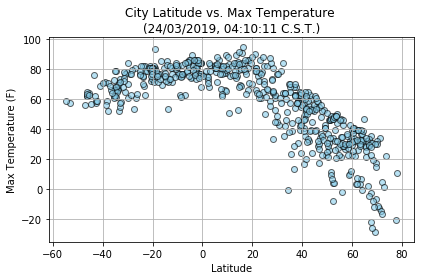

In [14]:

plt.scatter(cities_df['Lat'], cities_df['Max Temp'], 
            marker="o", facecolors="skyblue", edgecolors="black", alpha=.60)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature \n({Date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
plt.grid()

# Save Figure
plt.savefig("output_data/Weather_1_scatter_lat_v_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

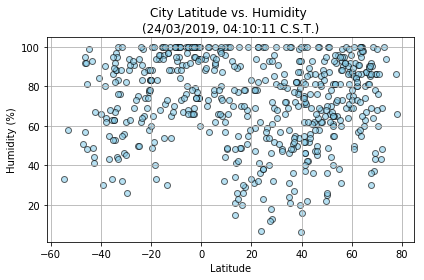

In [15]:
plt.scatter(cities_df['Lat'], 
            cities_df['Humidity'], 
            marker="o", facecolors="skyblue", edgecolors="black",
            alpha=.60)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity \n({Date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.grid()
  


# Save Figure
plt.savefig("output_data/Weather_2_scatter_lat_v_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

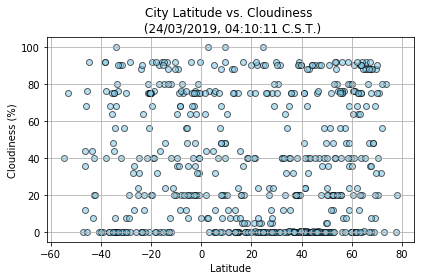

In [16]:
plt.scatter(cities_df['Lat'], 
            cities_df['Cloudiness'], 
            marker="o", facecolors="skyblue", edgecolors="black",
            alpha=.60)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness \n ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
plt.grid()
  


# Save Figure
plt.savefig("output_data/Weather_3_scatter_lat_v_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

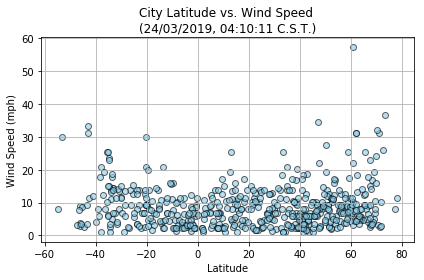

In [17]:
plt.scatter(cities_df['Lat'], 
            cities_df['Wind Speed'], 
            marker="o", facecolors="skyblue", edgecolors="black",
            alpha=.60)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed \n({Date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.grid()
  


# Save Figure
plt.savefig("output_data/Weather_4_scatter_lat_v_wind_speed.png")
plt.show()